In [1]:
import pandas as pd

try:
    df_basic = pd.read_excel("basic_information.xlsx")
    df_delivery = pd.read_excel("delivery_information.xlsx")
    df_followup = pd.read_excel("followup_data.xlsx")

    print("Basic Information:")
    display(df_basic.head())
    print("Shape:", df_basic.shape)
    print("\nPotential primary key candidates (df_basic):", list(df_basic.columns[df_basic.nunique() == len(df_basic)]))


    print("\nDelivery Information:")
    display(df_delivery.head())
    print("Shape:", df_delivery.shape)
    print("\nPotential primary key candidates (df_delivery):", list(df_delivery.columns[df_delivery.nunique() == len(df_delivery)]))


    print("\nFollowup Data:")
    display(df_followup.head())
    print("Shape:", df_followup.shape)
    print("\nPotential primary key candidates (df_followup):", list(df_followup.columns[df_followup.nunique() == len(df_followup)]))

except FileNotFoundError:
    print("One or more of the Excel files were not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Basic Information:


patient_id   ht    wt  education  income  ageatmenarche  ageatmarriage  \
0         P1  151  36.0          7    6000             14             26   
1         P2  143  63.6         15   10000             13             27   
2         P3  150  58.8         15   28000             16             27   
3         P4  159  57.8         11    8000             13             20   
4         P5  148  47.7         12   10000             14             20   

   ageatfirstpregnancy   district village occupation          diet  \
0                   28     Raigad  Alibag     Farmer      Low Carb   
1                   31     Raigad    Roha     Farmer    Vegetarian   
2                   28  Ratnagiri  Dapoli    Teacher      Low Carb   
3                   20  Ratnagiri  Dapoli  Housewife    Vegetarian   
4                   21     Raigad  Alibag  Housewife  High Protein   

     condition  
0     Diabetes  
1  Infertility  
2     Diabetes  
3       Asthma  
4  Infertility

Shape: (96, 13)

Potential primary key candidates (df_basic): ['patient_id']

Delivery Information:


patient_id dateofdelivery  ageatdelivery  weightatdelivery  \
0         P1     2021-05-02             28              40.0   
1         P2     2021-05-14             31              67.0   
2         P3     2021-06-27             28              61.0   
3         P4     2021-09-12             20              64.0   
4         P5     2022-01-18             21              48.0   

   haemoglobinatdelivery  placentalweight termofdelivery typeofdelivery  
0                   10.0              400      Full Term         Normal  
1                   11.0              480      Full Term           LSCS  
2                   12.8              520      Full Term           LSCS  
3                   10.6              520      Full Term           LSCS  
4                   12.8              450      Full Term           FTND

Shape: (96, 8)

Potential primary key candidates (df_delivery): ['patient_id']

Followup Data:


patient_id  Visit1_bpdis  Visit1_bpsys Visit1_date  Visit1_wt  Visit2_bpdis  \
0         P1            60           100  2021-02-24       36.0            60   
1         P2            70           110  2021-03-09       63.6            70   
2         P3            80           110  2021-05-06       58.8            80   
3         P4            70           100  2021-05-22       57.8            70   
4         P5            70           110  2021-01-06       47.7            60   

   Visit2_bpsys Visit2_date  Visit2_wt  Visit3_bpdis  Visit3_bpsys  \
0           100  2021-03-24       38.4            80           110   
1           110  2021-03-30       64.9            70           120   
2           120  2021-05-20       59.3            80           130   
3           100  2021-06-19       58.8            70           100   
4            90  2021-06-29       34.2            60           100   

  Visit3_date  Visit3_wt  Visit4_bpdis  Visit4_bpsys Visit4_date  Visit4_wt  
0  2021-04-14       38.7            80           120  2021-04-28       39.9  
1  2021-04-18       66.5            80           120  2021-05-12       67.2  
2  2021-06-03       60.1            80           124  2021-06-13       60.1  
3  2021-07-07       57.3            70            90  2021-08-27       63.1  
4  2021-09-11       40.0            80           120  2021-11-25       44.0

Shape: (96, 17)

Potential primary key candidates (df_followup): ['patient_id']


Basic Information Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           96 non-null     object 
 1   ht                   96 non-null     int64  
 2   wt                   96 non-null     float64
 3   education            96 non-null     int64  
 4   income               96 non-null     int64  
 5   ageatmenarche        96 non-null     int64  
 6   ageatmarriage        96 non-null     int64  
 7   ageatfirstpregnancy  96 non-null     int64  
 8   district             96 non-null     object 
 9   village              96 non-null     object 
 10  occupation           96 non-null     object 
 11  diet                 96 non-null     object 
 12  condition            79 non-null     object 
dtypes: float64(1), int64(6), object(6)
memory usage: 9.9+ KB
None

Missing values:
 patient_id              0
ht          

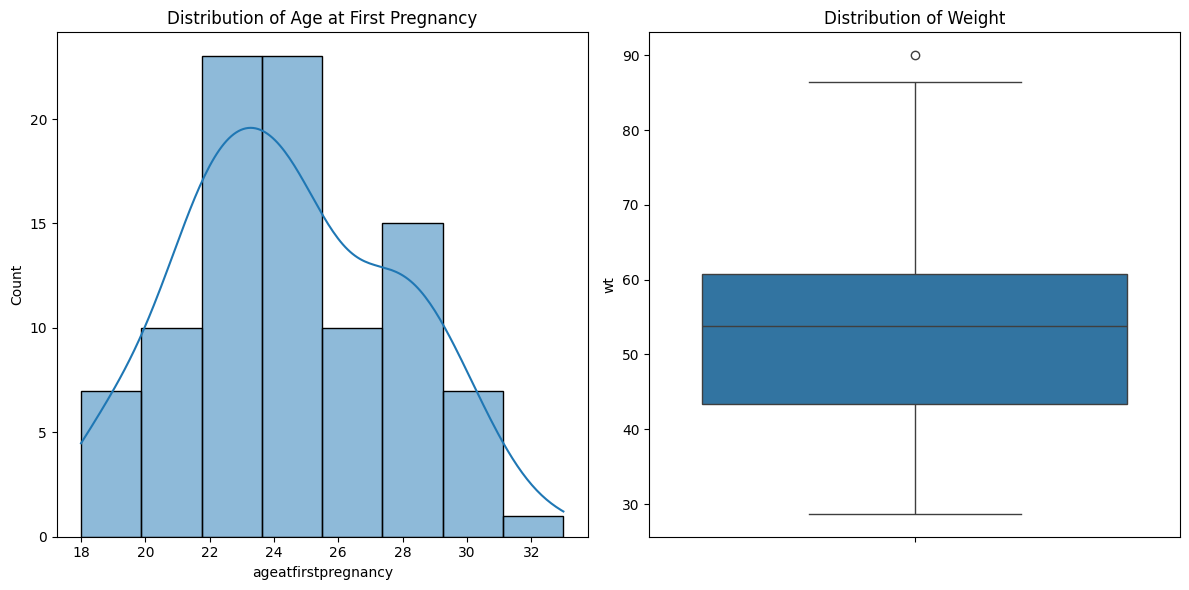

In [ ]:
## DATA EXPLORATION
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data type examination and missing values
print("Basic Information Data:")
print(df_basic.info())
print("\nMissing values:\n", df_basic.isnull().sum())
print("\nDuplicate rows:", df_basic.duplicated().sum())

print("\nDelivery Information Data:")
print(df_delivery.info())
print("\nMissing values:\n", df_delivery.isnull().sum())
print("\nDuplicate rows:", df_delivery.duplicated().sum())

print("\nFollowup Data:")
print(df_followup.info())
print("\nMissing values:\n", df_followup.isnull().sum())
print("\nDuplicate rows:", df_followup.duplicated().sum())

# Check for patient_id uniqueness across datasets
patient_ids_basic = set(df_basic['patient_id'])
patient_ids_delivery = set(df_delivery['patient_id'])
patient_ids_followup = set(df_followup['patient_id'])

print("\nPatient ID uniqueness check:")
print("Number of unique patient IDs in df_basic:", len(patient_ids_basic))
print("Number of unique patient IDs in df_delivery:", len(patient_ids_delivery))
print("Number of unique patient IDs in df_followup:", len(patient_ids_followup))

# Check for consistency across the datasets
print("\nChecking for consistency in patient IDs across datasets:")
print("Patient IDs present in all three datasets:", patient_ids_basic.intersection(patient_ids_delivery, patient_ids_followup))
print("Patient IDs unique to df_basic:", patient_ids_basic.difference(patient_ids_delivery, patient_ids_followup))
print("Patient IDs unique to df_delivery:", patient_ids_delivery.difference(patient_ids_basic, patient_ids_followup))
print("Patient IDs unique to df_followup:", patient_ids_followup.difference(patient_ids_basic, patient_ids_delivery))

# Descriptive statistics and visualizations (example for age and weight)
print("\nDescriptive Statistics (df_basic):")
print(df_basic[['ageatmenarche', 'ageatmarriage', 'ageatfirstpregnancy', 'ht', 'wt']].describe())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_basic['ageatfirstpregnancy'], kde=True)
plt.title('Distribution of Age at First Pregnancy')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_basic['wt'])
plt.title('Distribution of Weight')
plt.tight_layout()
plt.show()


Checking for consistency in patient IDs across datasets:
Patient IDs present in all three datasets: {'P61', 'P55', 'P26', 'P11', 'P1', 'P44', 'P57', 'P87', 'P74', 'P52', 'P85', 'P68', 'P80', 'P39', 'P88', 'P25', 'P13', 'P6', 'P30', 'P84', 'P51', 'P71', 'P41', 'P59', 'P45', 'P21', 'P54', 'P48', 'P81', 'P70', 'P7', 'P36', 'P22', 'P50', 'P67', 'P12', 'P9', 'P53', 'P49', 'P37', 'P27', 'P60', 'P89', 'P43', 'P92', 'P77', 'P23', 'P29', 'P16', 'P63', 'P78', 'P79', 'P47', 'P82', 'P32', 'P90', 'P19', 'P75', 'P3', 'P8', 'P65', 'P69', 'P34', 'P42', 'P2', 'P93', 'P46', 'P17', 'P72', 'P94', 'P40', 'P76', 'P24', 'P96', 'P14', 'P5', 'P73', 'P38', 'P18', 'P33', 'P58', 'P31', 'P4', 'P20', 'P28', 'P95', 'P10', 'P56', 'P83', 'P62', 'P66', 'P86', 'P35', 'P91', 'P64', 'P15'}


<ipython-input-3-178f3d613082>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition', data=df_basic, palette="viridis")


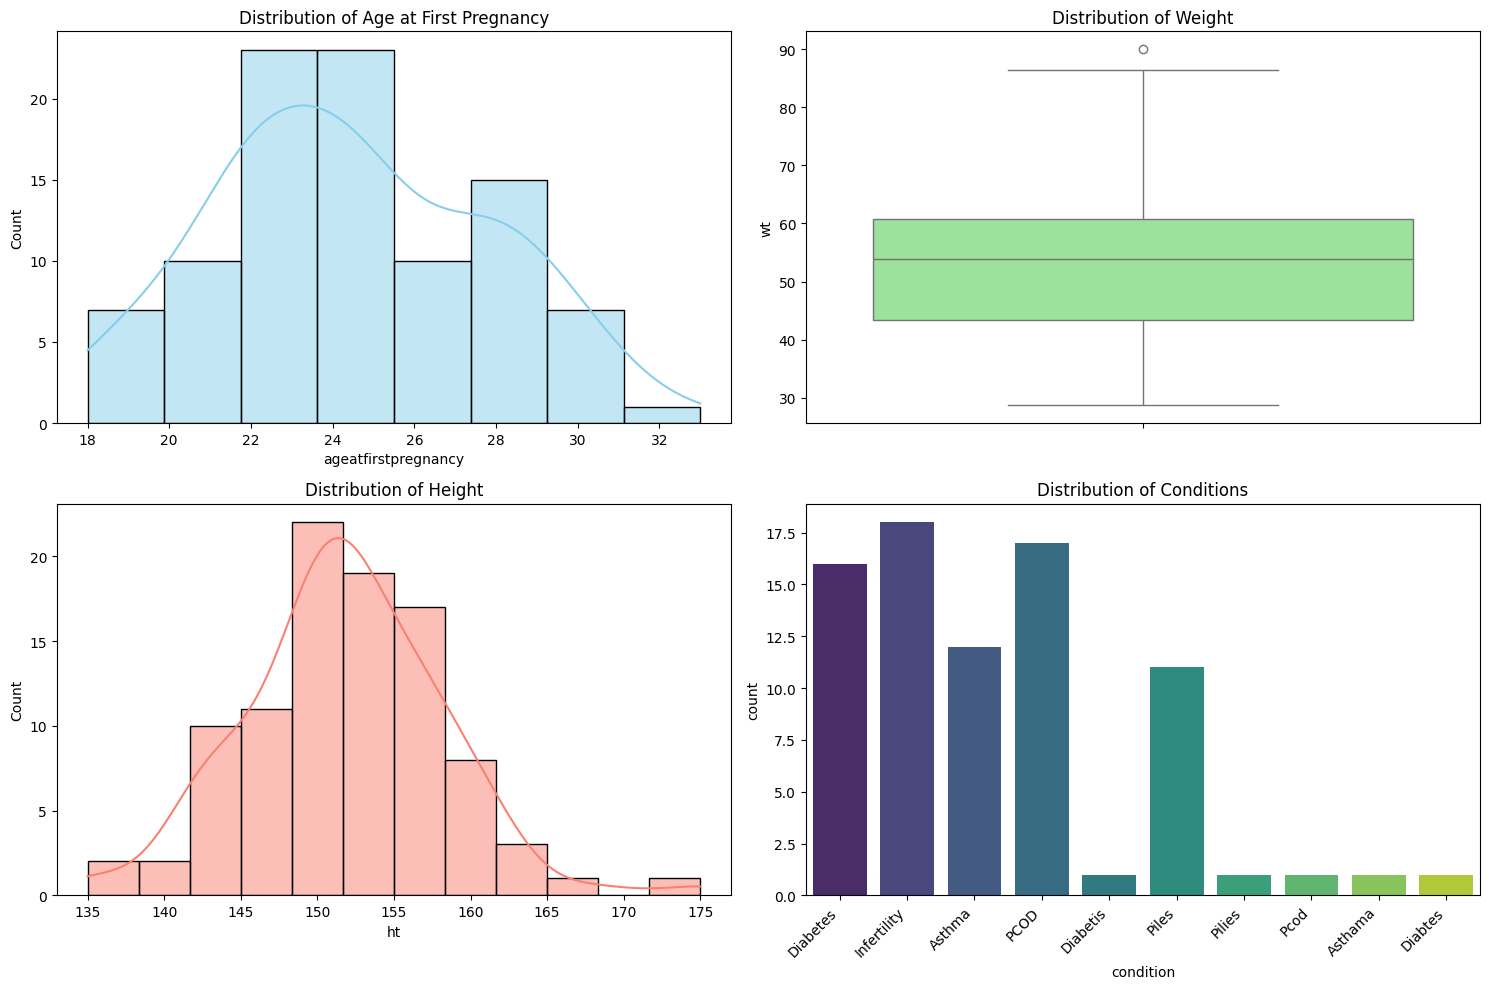

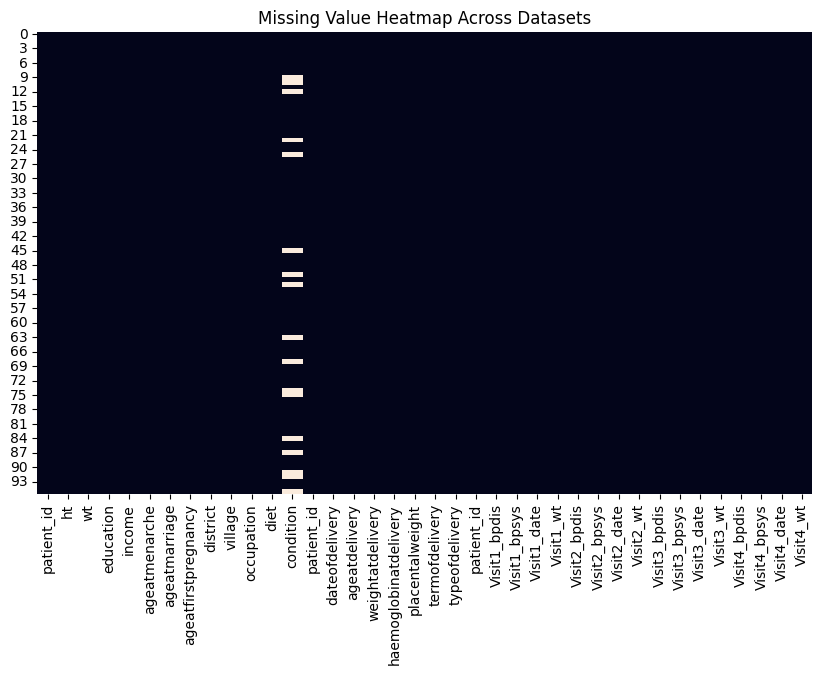

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (code from the previous block) ...

# Check for consistency across the datasets (more detailed output)
print("\nChecking for consistency in patient IDs across datasets:")
print("Patient IDs present in all three datasets:", patient_ids_basic.intersection(patient_ids_delivery, patient_ids_followup))
if len(patient_ids_basic.difference(patient_ids_delivery, patient_ids_followup)) > 0:
    print("Patient IDs unique to df_basic:", patient_ids_basic.difference(patient_ids_delivery, patient_ids_followup))
if len(patient_ids_delivery.difference(patient_ids_basic, patient_ids_followup)) > 0:
    print("Patient IDs unique to df_delivery:", patient_ids_delivery.difference(patient_ids_basic, patient_ids_followup))
if len(patient_ids_followup.difference(patient_ids_basic, patient_ids_delivery)) > 0:
    print("Patient IDs unique to df_followup:", patient_ids_followup.difference(patient_ids_basic, patient_ids_delivery))

# More detailed visualizations
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_basic['ageatfirstpregnancy'], kde=True, color='skyblue')
plt.title('Distribution of Age at First Pregnancy')

plt.subplot(2, 2, 2)
sns.boxplot(y=df_basic['wt'], color='lightgreen')
plt.title('Distribution of Weight')

plt.subplot(2, 2, 3)
sns.histplot(df_basic['ht'], kde=True, color='salmon')
plt.title('Distribution of Height')

plt.subplot(2,2,4)
sns.countplot(x='condition', data=df_basic, palette="viridis")
plt.title('Distribution of Conditions')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.concat([df_basic, df_delivery, df_followup], axis=1).isnull(), cbar=False)
plt.title('Missing Value Heatmap Across Datasets')
plt.show()

In [ ]:
## DATA PREPERATION
# Impute missing values in 'condition' column
most_frequent_condition = df_basic['condition'].mode()[0]
df_basic['condition'] = df_basic['condition'].fillna(most_frequent_condition)

# Verify patient_id uniqueness
print("Number of unique patient IDs in df_basic:", df_basic['patient_id'].nunique())
print("Number of unique patient IDs in df_delivery:", df_delivery['patient_id'].nunique())
print("Number of unique patient IDs in df_followup:", df_followup['patient_id'].nunique())

Number of unique patient IDs in df_basic: 96
Number of unique patient IDs in df_delivery: 96
Number of unique patient IDs in df_followup: 96


In [ ]:
## DATA WRANGLING
# Merge df_basic and df_delivery
df_merged = pd.merge(df_basic, df_delivery, on='patient_id', how='inner')

# Merge df_merged with df_followup
df_final = pd.merge(df_merged, df_followup, on='patient_id', how='inner')

# Display the first few rows and shape of the final dataframe
display(df_final.head())
print("Shape of the final dataframe:", df_final.shape)

patient_id   ht    wt  education  income  ageatmenarche  ageatmarriage  \
0         P1  151  36.0          7    6000             14             26   
1         P2  143  63.6         15   10000             13             27   
2         P3  150  58.8         15   28000             16             27   
3         P4  159  57.8         11    8000             13             20   
4         P5  148  47.7         12   10000             14             20   

   ageatfirstpregnancy   district village  ... Visit2_date Visit2_wt  \
0                   28     Raigad  Alibag  ...  2021-03-24      38.4   
1                   31     Raigad    Roha  ...  2021-03-30      64.9   
2                   28  Ratnagiri  Dapoli  ...  2021-05-20      59.3   
3                   20  Ratnagiri  Dapoli  ...  2021-06-19      58.8   
4                   21     Raigad  Alibag  ...  2021-06-29      34.2   

  Visit3_bpdis Visit3_bpsys  Visit3_date  Visit3_wt  Visit4_bpdis  \
0           80          110   2021-04-14       38.7            80   
1           70          120   2021-04-18       66.5            80   
2           80          130   2021-06-03       60.1            80   
3           70          100   2021-07-07       57.3            70   
4           60          100   2021-09-11       40.0            80   

   Visit4_bpsys Visit4_date Visit4_wt  
0           120  2021-04-28      39.9  
1           120  2021-05-12      67.2  
2           124  2021-06-13      60.1  
3            90  2021-08-27      63.1  
4           120  2021-11-25      44.0  

[5 rows x 36 columns]

Shape of the final dataframe: (96, 36)


ht         wt  education        income  ageatmenarche  \
count   96.000000  96.000000  96.000000     96.000000      96.000000   
mean   151.729167  53.564583  10.708333  13906.250000      13.375000   
std      6.452220  12.249702   2.470528   6212.175015       1.241815   
min    135.000000  28.700000   4.000000   1000.000000      10.000000   
25%    148.000000  43.400000   9.750000  10000.000000      13.000000   
50%    152.000000  53.800000  12.000000  11000.000000      13.000000   
75%    156.000000  60.800000  12.000000  18000.000000      14.000000   
max    175.000000  90.000000  15.000000  30000.000000      19.000000   

       ageatmarriage  ageatfirstpregnancy  ageatdelivery  weightatdelivery  \
count      96.000000            96.000000      96.000000         96.000000   
mean       22.729167            24.479167      26.489583         58.454167   
std         2.870830             3.393428       4.139654         11.765166   
min        17.000000            18.000000      18.000000         39.000000   
25%        20.000000            22.000000      24.000000         49.000000   
50%        23.000000            24.000000      26.000000         58.000000   
75%        25.000000            27.000000      29.000000         66.475000   
max        30.000000            33.000000      43.000000        100.000000   

       haemoglobinatdelivery  ...  Visit1_wt  Visit2_bpdis  Visit2_bpsys  \
count              96.000000  ...  96.000000     96.000000     96.000000   
mean               11.364583  ...  53.564583     70.208333    108.395833   
std                 1.323152  ...  12.249702      8.457842     10.929900   
min                 5.000000  ...  28.700000     50.000000     90.000000   
25%                10.975000  ...  43.400000     60.000000    100.000000   
50%                11.400000  ...  53.800000     70.000000    110.000000   
75%                12.125000  ...  60.800000     80.000000    110.000000   
max                15.400000  ...  90.000000     90.000000    150.000000   

       Visit2_wt  Visit3_bpdis  Visit3_bpsys  Visit3_wt  Visit4_bpdis  \
count  96.000000     96.000000     96.000000  96.000000     96.000000   
mean   54.299167     70.145833    107.854167  55.674479     71.041667   
std    12.006902      8.822196     12.119562  12.136209      9.231430   
min    31.600000     50.000000     80.000000  35.000000     50.000000   
25%    44.450000     60.000000    100.000000  45.000000     67.500000   
50%    53.600000     70.000000    110.000000  55.400000     70.000000   
75%    62.025000     70.000000    110.000000  62.050000     80.000000   
max    89.300000     90.000000    150.000000  92.700000    100.000000   

       Visit4_bpsys  Visit4_wt  
count     96.000000  96.000000  
mean     109.583333  57.383021  
std       13.862229  12.472000  
min       80.000000  35.000000  
25%      100.000000  46.525000  
50%      110.000000  57.450000  
75%      120.000000  65.000000  
max      170.000000  99.900000  

[8 rows x 23 columns]

<ipython-input-8-5339ef0dbf59>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y=outcome, data=df_final, palette="Set3")
<ipython-input-8-5339ef0dbf59>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y=outcome, data=df_final, palette="Set3")
<ipython-input-8-5339ef0dbf59>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y=outcome, data=df_final, palette="Set3")


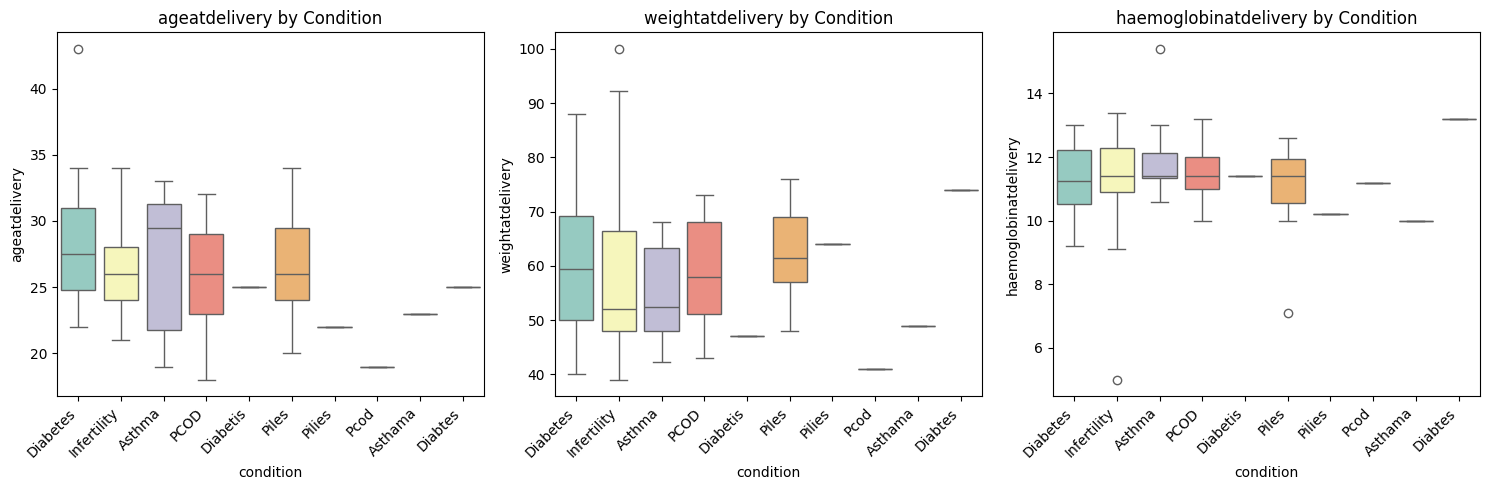

In [ ]:
## DATA ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numerical features
numerical_features = df_final.select_dtypes(include=['number'])
display(numerical_features.describe())

# Relationship between delivery outcomes and 'condition'
delivery_outcomes = ['ageatdelivery', 'weightatdelivery', 'haemoglobinatdelivery']
plt.figure(figsize=(15, 5))
for i, outcome in enumerate(delivery_outcomes):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='condition', y=outcome, data=df_final, palette="Set3")
    plt.title(f'{outcome} by Condition')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Basic Information:


patient_id   ht    wt  education  income  ageatmenarche  ageatmarriage  \
0         P1  151  36.0          7    6000             14             26   
1         P2  143  63.6         15   10000             13             27   
2         P3  150  58.8         15   28000             16             27   
3         P4  159  57.8         11    8000             13             20   
4         P5  148  47.7         12   10000             14             20   

   ageatfirstpregnancy   district village occupation          diet  \
0                   28     Raigad  Alibag     Farmer      Low Carb   
1                   31     Raigad    Roha     Farmer    Vegetarian   
2                   28  Ratnagiri  Dapoli    Teacher      Low Carb   
3                   20  Ratnagiri  Dapoli  Housewife    Vegetarian   
4                   21     Raigad  Alibag  Housewife  High Protein   

     condition  
0     Diabetes  
1  Infertility  
2     Diabetes  
3       Asthma  
4  Infertility

Shape: (96, 13)

Potential primary key candidates (df_basic): ['patient_id']

Delivery Information:


patient_id dateofdelivery  ageatdelivery  weightatdelivery  \
0         P1     2021-05-02             28              40.0   
1         P2     2021-05-14             31              67.0   
2         P3     2021-06-27             28              61.0   
3         P4     2021-09-12             20              64.0   
4         P5     2022-01-18             21              48.0   

   haemoglobinatdelivery  placentalweight termofdelivery typeofdelivery  
0                   10.0              400      Full Term         Normal  
1                   11.0              480      Full Term           LSCS  
2                   12.8              520      Full Term           LSCS  
3                   10.6              520      Full Term           LSCS  
4                   12.8              450      Full Term           FTND

Shape: (96, 8)

Potential primary key candidates (df_delivery): ['patient_id']

Followup Data:


patient_id  Visit1_bpdis  Visit1_bpsys Visit1_date  Visit1_wt  Visit2_bpdis  \
0         P1            60           100  2021-02-24       36.0            60   
1         P2            70           110  2021-03-09       63.6            70   
2         P3            80           110  2021-05-06       58.8            80   
3         P4            70           100  2021-05-22       57.8            70   
4         P5            70           110  2021-01-06       47.7            60   

   Visit2_bpsys Visit2_date  Visit2_wt  Visit3_bpdis  Visit3_bpsys  \
0           100  2021-03-24       38.4            80           110   
1           110  2021-03-30       64.9            70           120   
2           120  2021-05-20       59.3            80           130   
3           100  2021-06-19       58.8            70           100   
4            90  2021-06-29       34.2            60           100   

  Visit3_date  Visit3_wt  Visit4_bpdis  Visit4_bpsys Visit4_date  Visit4_wt  
0  2021-04-14       38.7            80           120  2021-04-28       39.9  
1  2021-04-18       66.5            80           120  2021-05-12       67.2  
2  2021-06-03       60.1            80           124  2021-06-13       60.1  
3  2021-07-07       57.3            70            90  2021-08-27       63.1  
4  2021-09-11       40.0            80           120  2021-11-25       44.0

Shape: (96, 17)

Potential primary key candidates (df_followup): ['patient_id']

Merged Data:


patient_id   ht    wt  education  income  ageatmenarche  ageatmarriage  \
0         P1  151  36.0          7    6000             14             26   
1        P10  151  55.7          7   10000             13             25   
2        P11  152  43.9         12   10000             14             23   
3        P12  154  39.5         12   10000             14             18   
4        P13  150  42.1          7   30000             13             21   

   ageatfirstpregnancy   district village  ... Visit2_date Visit2_wt  \
0                   28     Raigad  Alibag  ...  2021-03-24      38.4   
1                   27  Ratnagiri  Dapoli  ...  2022-04-29      54.5   
2                   24     Raigad     Pen  ...  2022-07-26      40.0   
3                   19     Raigad    Roha  ...  2024-07-26      40.0   
4                   22     Raigad  Alibag  ...  2022-10-21      42.3   

  Visit3_bpdis Visit3_bpsys  Visit3_date  Visit3_wt  Visit4_bpdis  \
0           80          110   2021-04-14       38.7            80   
1           60          100   2022-05-20       54.0            70   
2           70          110   2022-11-22       48.6            70   
3           70          120   2024-08-22       41.0            70   
4           70          110   2022-12-07       39.2            70   

   Visit4_bpsys Visit4_date Visit4_wt  
0           120  2021-04-28      39.9  
1           110  2022-06-18      56.8  
2           100  2023-03-01      43.5  
3           110  2024-09-18      42.6  
4           110  2022-12-08      40.8  

[5 rows x 36 columns]

Shape: (96, 36)

Descriptive Statistics:
               ht         wt  education        income  ageatmenarche  \
count   96.000000  96.000000  96.000000     96.000000      96.000000   
mean   151.729167  53.564583  10.708333  13906.250000      13.375000   
std      6.452220  12.249702   2.470528   6212.175015       1.241815   
min    135.000000  28.700000   4.000000   1000.000000      10.000000   
25%    148.000000  43.400000   9.750000  10000.000000      13.000000   
50%    152.000000  53.800000  12.000000  11000.000000      13.000000   
75%    156.000000  60.800000  12.000000  18000.000000      14.000000   
max    175.000000  90.000000  15.000000  30000.000000      19.000000   

       ageatmarriage  ageatfirstpregnancy  ageatdelivery  weightatdelivery  \
count      96.000000            96.000000      96.000000         96.000000   
mean       22.729167            24.479167      26.489583         58.454167   
std         2.870830             3.393428       4.139654         11.765166  

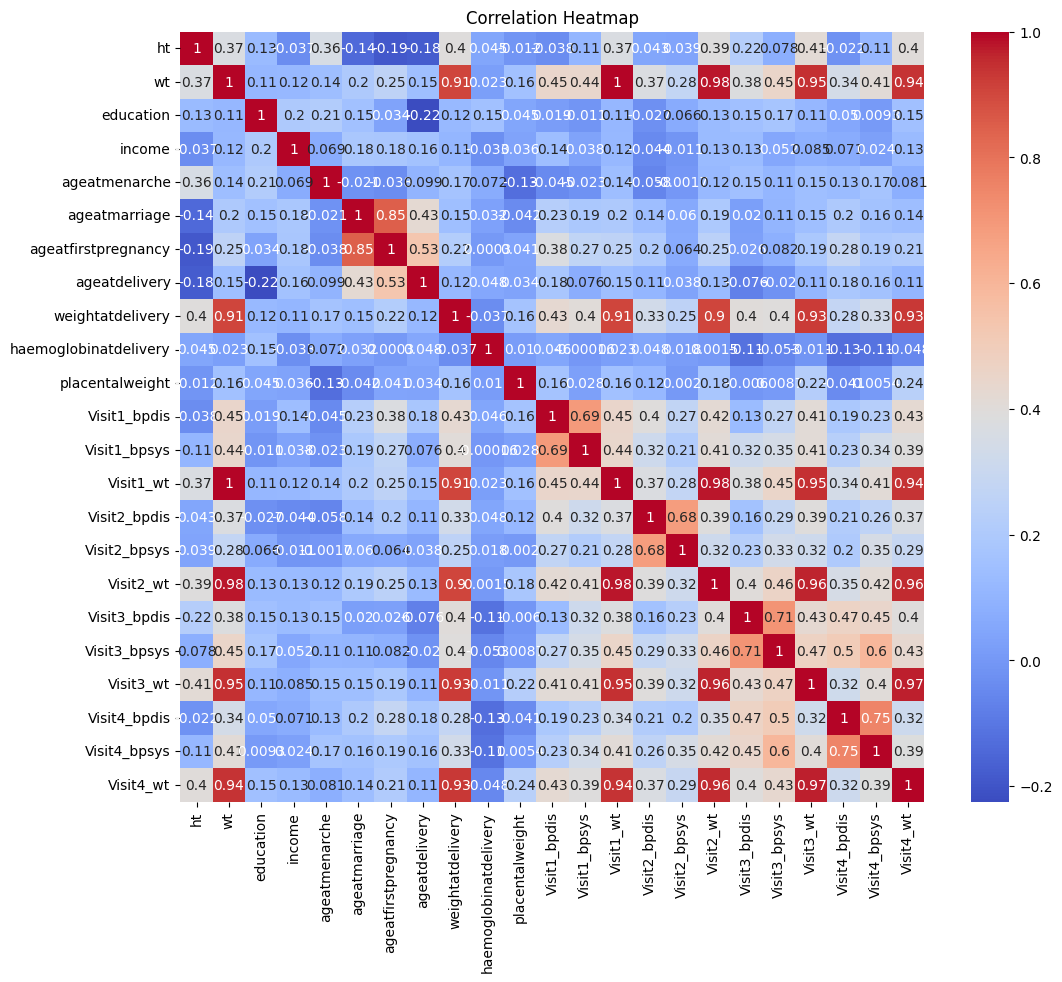

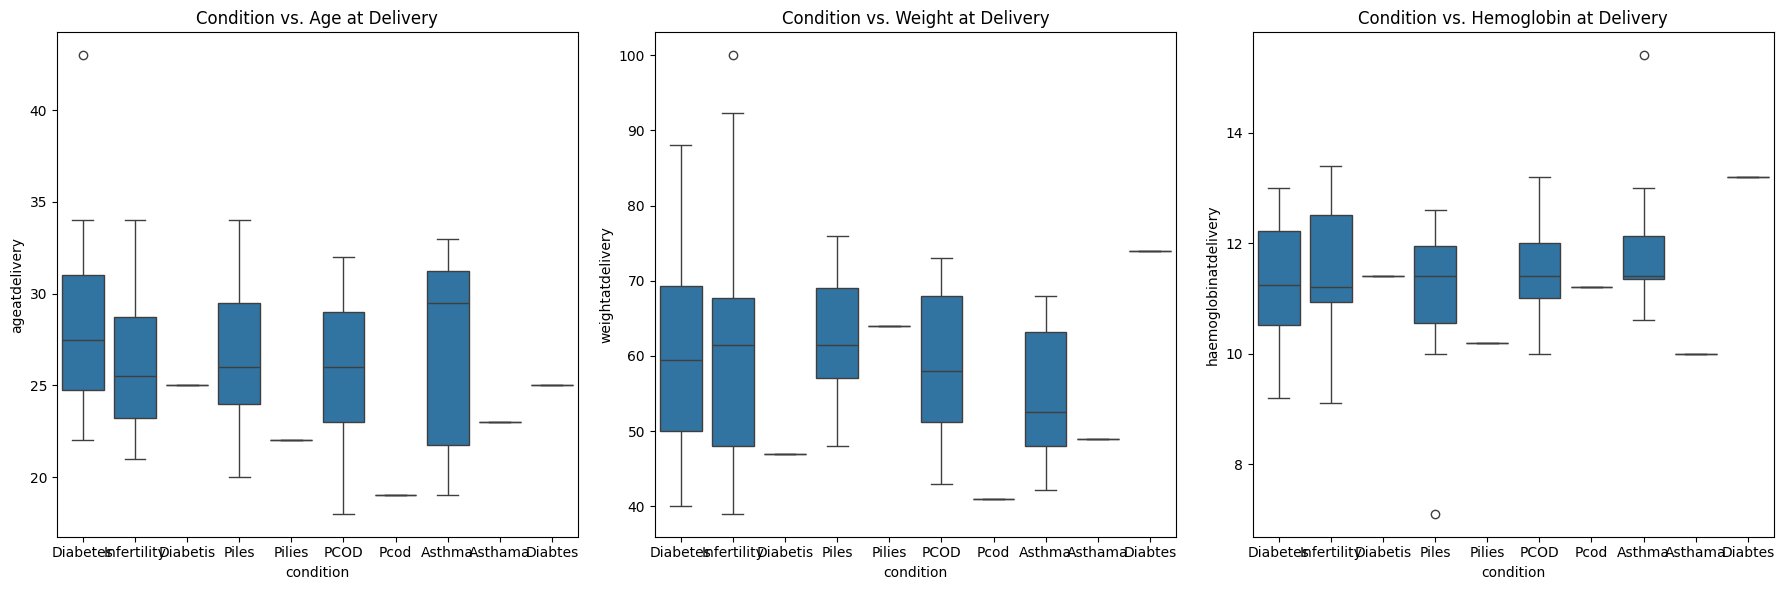

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df_basic = pd.read_excel("basic_information.xlsx")
    df_delivery = pd.read_excel("delivery_information.xlsx")
    df_followup = pd.read_excel("followup_data.xlsx")

    print("Basic Information:")
    display(df_basic.head())
    print("Shape:", df_basic.shape)
    print("\nPotential primary key candidates (df_basic):", list(df_basic.columns[df_basic.nunique() == len(df_basic)]))


    print("\nDelivery Information:")
    display(df_delivery.head())
    print("Shape:", df_delivery.shape)
    print("\nPotential primary key candidates (df_delivery):", list(df_delivery.columns[df_delivery.nunique() == len(df_delivery)]))


    print("\nFollowup Data:")
    display(df_followup.head())
    print("Shape:", df_followup.shape)
    print("\nPotential primary key candidates (df_followup):", list(df_followup.columns[df_followup.nunique() == len(df_followup)]))

except FileNotFoundError:
    print("One or more of the Excel files were not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Merge the dataframes on 'patient_id'
df_merged = pd.merge(pd.merge(df_basic, df_delivery, on='patient_id', how='outer'), df_followup, on='patient_id', how='outer')

print("\nMerged Data:")
display(df_merged.head())
print("Shape:", df_merged.shape)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df_merged.describe())

# Correlation Analysis
# Correlation Analysis
print("\nCorrelation Analysis:")
# Select only numerical features for correlation calculation
numerical_features = df_merged.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Condition vs. Delivery Outcomes
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='condition', y='ageatdelivery', data=df_merged)
plt.title('Condition vs. Age at Delivery')

plt.subplot(1, 3, 2)
sns.boxplot(x='condition', y='weightatdelivery', data=df_merged)
plt.title('Condition vs. Weight at Delivery')

plt.subplot(1, 3, 3)
sns.boxplot(x='condition', y='haemoglobinatdelivery', data=df_merged)
plt.title('Condition vs. Hemoglobin at Delivery')

plt.tight_layout()
plt.show()